In [1]:
#Installing important Libraries
# !pip install nltk
# !pip install textblob
# !pip install wordcloud


#External References: https://www.kaggle.com/code/serikovameruyert/meruyert-serikova-ass-5
https://www.kaggle.com/code/tohidyousefi/sentiment-analysis-on-amazon-product-reviews

In [2]:
from warnings import filterwarnings
import numpy as np
import pandas as pd
import re
from nltk.tokenize import RegexpTokenizer
# import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk

In [3]:
df = pd.read_csv("amazon_reviews.csv", sep=",")
df.head()

sino  reviewerName  overall  \
0     0           NaN      4.0   
1     1          0mie      5.0   
2     2           1K3      4.0   
3     3           1m2      5.0   
4     4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0                   0   
4            0           0           0                   0   

   score_average_rating  wilson_lower_bound  
0                   0.0                 0.0  
1                   0.0                 0.0  
2                   0.0                 0.0  
3                   0.0                 0.0  
4                   0.0                 0.0

#Data Preprocessing

In [4]:
def preprocess(sentence):
    sentence = str(sentence)  # Convert input to string if not already
    sentence = sentence.lower()  # Convert text to lowercase
    sentence = sentence.replace('{html}', '')  # Remove '{html}' from text
    
    cleanr = re.compile('<.*?>')  # Compile regex pattern to remove HTML tags
    cleantext = re.sub(cleanr, '', sentence)  # Remove HTML tags
    
    rem_url = re.sub(r'http\S+', '', cleantext)  # Remove URLs
    
    rem_num = re.sub('[0-9]+', '', rem_url)  # Remove numbers
    
    tokenizer = RegexpTokenizer(r'\w+')  # Create a tokenizer to extract words
    tokens = tokenizer.tokenize(rem_num)  # Tokenize the text
    
    #customize the stop words
    custom_stopwords = set(stopwords.words('english')) - {'no', 'not'}
    filtered_words = [w for w in tokens if len(w) > 1 if w.lower() not in custom_stopwords]
    
    stemmer = PorterStemmer()  # Create a Porter stemmer instance
    stem_words = [stemmer.stem(w) for w in filtered_words]  # Stem the words
    
    lemmatizer = WordNetLemmatizer()  # Create a WordNet lemmatizer instance
    lemma_words = [lemmatizer.lemmatize(w) for w in stem_words]  # Lemmatize the words
    
    return " ".join(filtered_words)  # Return the preprocessed text

In [5]:
df['reviewText'] = df['reviewText'].apply(preprocess)
df['reviewText']

0                                               no issues
1       purchased device worked advertised never much ...
2       works expected sprung higher capacity think ma...
3       think worked great diff bran gb card went sout...
4       bought retail packaging arrived legit orange e...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used extending capabilities samsung galaxy not...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    heard bad things gb micro sd card crapping wee...
Name: reviewText, Length: 4915, dtype: object

#Data Visualization

In [6]:
def text_visualization(dataframe, dependent_var, barplot=True, wordcloud=True):
    # Calculation of Term Frequencies
    # Splitting text, counting occurrences of each word, and summing them up
    tf = dataframe[dependent_var].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
    tf.columns = ["words", "tf"]  # Naming columns as 'words' and 'tf' (term frequency)

    if barplot:
        # Bar Plot for words with term frequency > 500
        tf[tf["tf"] > 500].plot.barh(x="words", y="tf")  # Plotting horizontal bar plot
        plt.title("Calculation of Term Frequencies: Barplot")  # Setting title for the plot
        plt.xlabel("Term Frequency")  # Labeling x-axis
        plt.ylabel("Words")  # Labeling y-axis
        plt.show()  # Displaying the bar plot

    if wordcloud:
        # WordCloud
        # Concatenating all texts into a single string for word cloud generation
        text = " ".join(i for i in dataframe[dependent_var])
        # Generating word cloud
        wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white").generate(text)
        plt.figure(figsize=[10, 10])  # Setting the figure size
        plt.imshow(wordcloud, interpolation="bilinear")  # Displaying the word cloud
        plt.axis("off")  # Turning off the axis
        plt.title("Calculation of Term Frequencies: Wordcloud")  # Setting title for the word cloud
        plt.show()  # Displaying the word cloud
        wordcloud.to_file("wordcloud.png")  # Saving the word cloud as an image file


C:\Users\Deshan Sumanathilaka\AppData\Local\Temp\ipykernel_7228\3912764821.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf = dataframe[dependent_var].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
C:\Users\Deshan Sumanathilaka\AppData\Local\Temp\ipykernel_7228\3912764821.py:4: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  tf = dataframe[dependent_var].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
C:\Users\Deshan Sumanathilaka\AppData\Local\Temp\ipykernel_7228\3912764821.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf = dataframe[dependent_var].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
C:\Users\Deshan Suman

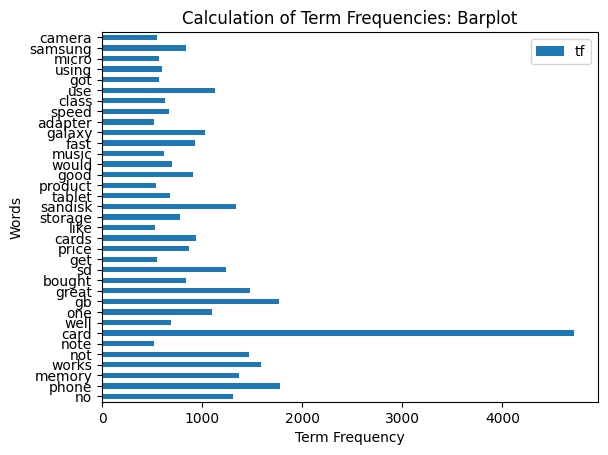

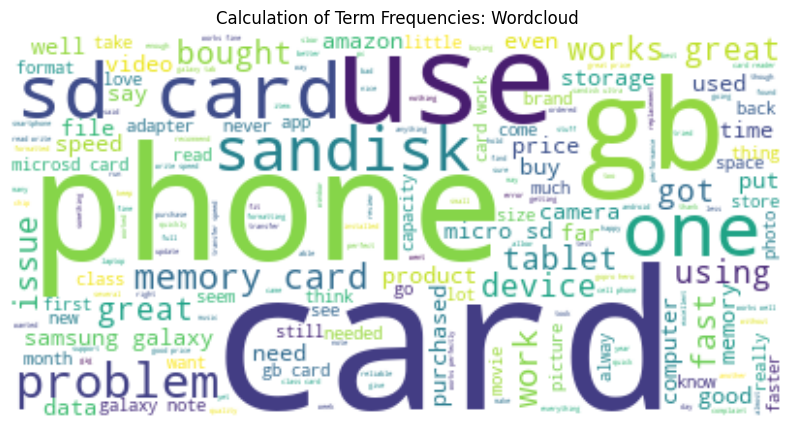

In [8]:
text_visualization(df, "reviewText")

#Feature Engineering
Identifying the Co-relation between the attributes and plotting them

In [ ]:
#!pip install seaborn

In [9]:

import seaborn as sns

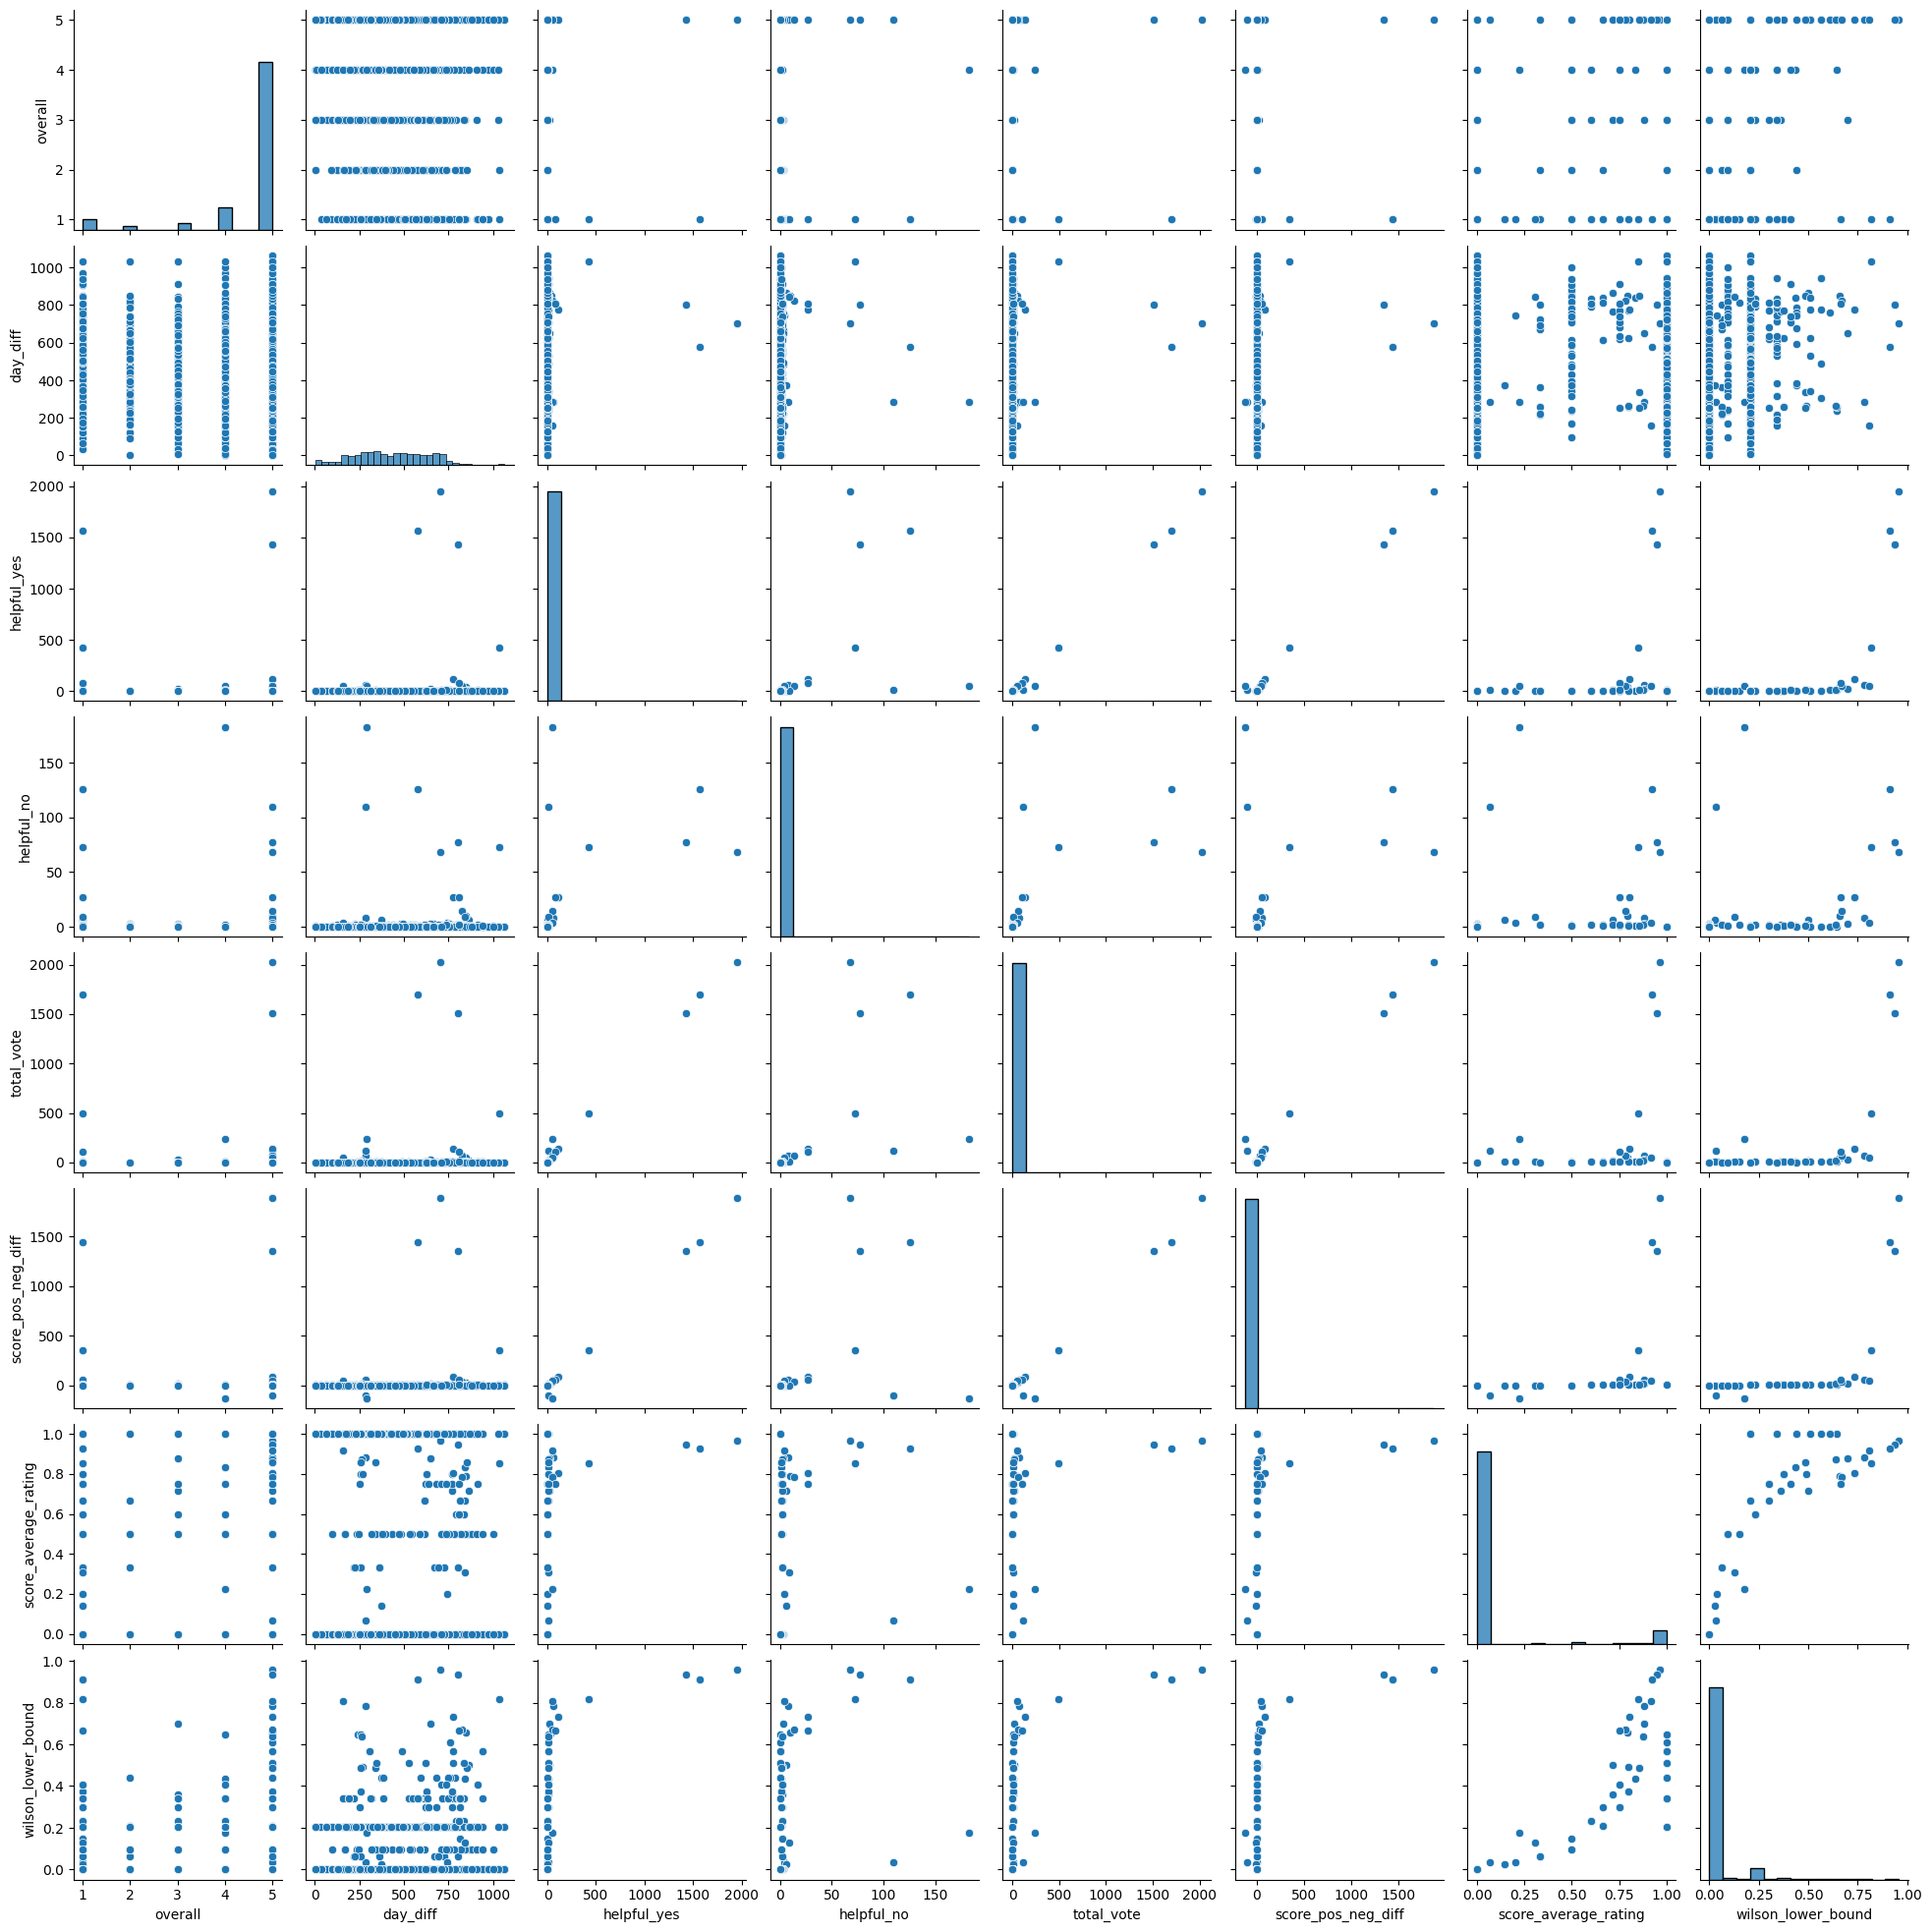

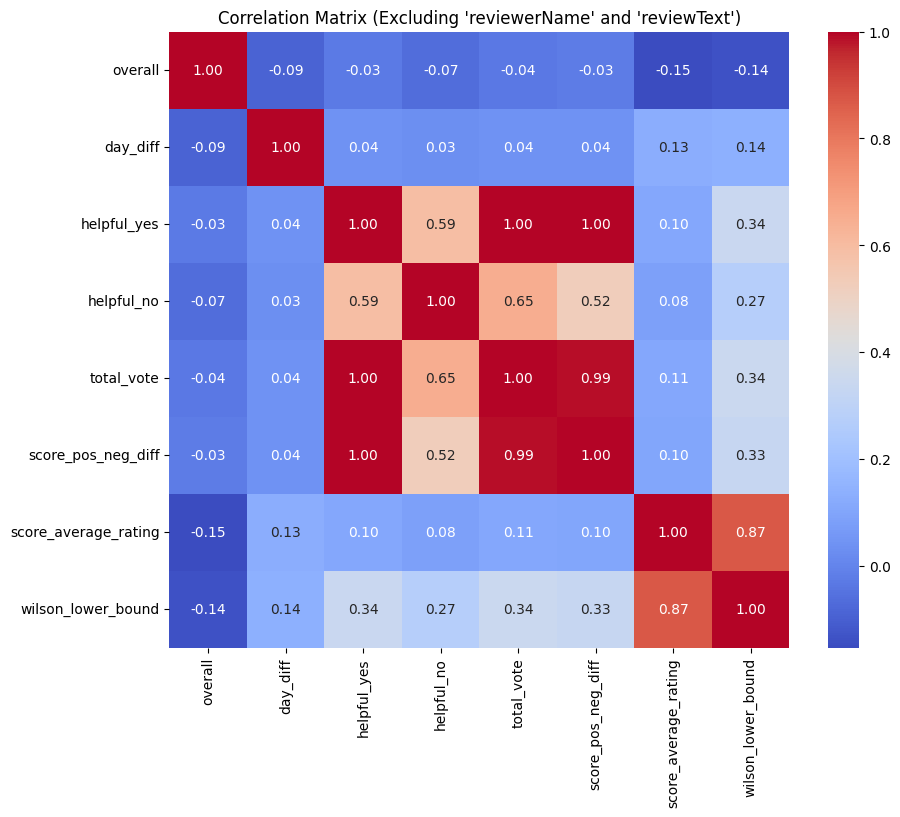

In [10]:

# Pairplot for numerical attributes
sns.pairplot(df[['overall', 'day_diff', 'helpful_yes', 'helpful_no', 'total_vote', 'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound']])
plt.show()

columns_to_exclude = ['reviewerName', 'reviewText','reviewTime','sino']
filtered_df = df.drop(columns=columns_to_exclude, errors='ignore')

# Calculate the correlation matrix
correlation_matrix = filtered_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Excluding 'reviewerName' and 'reviewText')")
plt.show()


#Sentiment Analysis
Plaority score generation using the NLTK sentiment


In [11]:
def polarity_scores(dataframe, dependent_var):
  sia = SentimentIntensityAnalyzer()
  dataframe["polarity_score"] = dataframe[dependent_var].apply(lambda x: sia.polarity_scores(x)["compound"])

In [12]:
#nltk.download('vader_lexicon')

In [13]:
polarity_scores(df, "reviewText")


In [14]:
#print(df[['overall','reviewText', 'polarity_score']])
df

sino  reviewerName  overall  \
0        0           NaN      4.0   
1        1          0mie      5.0   
2        2           1K3      4.0   
3        3           1m2      5.0   
4        4  2&amp;1/2Men      5.0   
...    ...           ...      ...   
4910  4910        ZM "J"      1.0   
4911  4911            Zo      5.0   
4912  4912     Z S Liske      5.0   
4913  4913      Z Taylor      5.0   
4914  4914           Zza      5.0   

                                             reviewText  reviewTime  day_diff  \
0                                             no issues  2014-07-23       138   
1     purchased device worked advertised never much ...  2013-10-25       409   
2     works expected sprung higher capacity think ma...  2012-12-23       715   
3     think worked great diff bran gb card went sout...  2013-11-21       382   
4     bought retail packaging arrived legit orange e...  2013-07-13       513   
...                                                 ...         ...       ...   
4910  bought sandisk gb class use htc inspire months...  2013-07-23       503   
4911  used extending capabilities samsung galaxy not...  2013-08-22       473   
4912  great card fast reliable comes optional adapte...  2014-03-31       252   
4913        good amount space stuff want fits gopro say  2013-09-16       448   
4914  heard bad things gb micro sd card crapping wee...  2014-02-01       310   

      helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0               0           0           0                   0   
1               0           0           0                   0   
2               0           0           0                   0   
3               0           0           0                   0   
4               0           0           0                   0   
...           ...         ...         ...                 ...   
4910            0           0           0                   0   
4911            0           0           0                   0   
4912            0           0           0                   0   
4913            0           0           0                   0   
4914            0           0           0                   0   

      score_average_rating  wilson_lower_bound  polarity_score  
0                      0.0                 0.0         -0.2960  
1                      0.0                 0.0         -0.2960  
2                      0.0                 0.0         -0.3089  
3                      0.0                 0.0          0.9201  
4                      0.0                 0.0          0.7087  
...                    ...                 ...             ...  
4910                   0.0                 0.0          0.0772  
4911                   0.0                 0.0          0.1761  
4912                   0.0                 0.0          0.8481  
4913                   0.0                 0.0          0.4939  
4914                   0.0                 0.0          0.0516  

[4915 rows x 13 columns]

In [20]:
def get_sentiment_category(scores):
    if scores >= 0.05:
        return 1
    elif scores <= -0.05:
        return -1
    else:
        return 0

In [21]:
df['Sentiment'] = df['polarity_score'].apply(get_sentiment_category)

In [22]:
print(df[['overall','reviewText', 'polarity_score','Sentiment']])

      overall                                         reviewText  \
0         4.0                                          no issues   
1         5.0  purchased device worked advertised never much ...   
2         4.0  works expected sprung higher capacity think ma...   
3         5.0  think worked great diff bran gb card went sout...   
4         5.0  bought retail packaging arrived legit orange e...   
...       ...                                                ...   
4910      1.0  bought sandisk gb class use htc inspire months...   
4911      5.0  used extending capabilities samsung galaxy not...   
4912      5.0  great card fast reliable comes optional adapte...   
4913      5.0        good amount space stuff want fits gopro say   
4914      5.0  heard bad things gb micro sd card crapping wee...   

      polarity_score  Sentiment  
0            -0.2960         -1  
1            -0.2960         -1  
2            -0.3089         -1  
3             0.9201          1  
4            

#Analysing the distributions of the sentiment and the overall order

C:\Users\Deshan Sumanathilaka\AppData\Local\Temp\ipykernel_7228\4218115800.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, order=sentiment_order, palette='viridis')


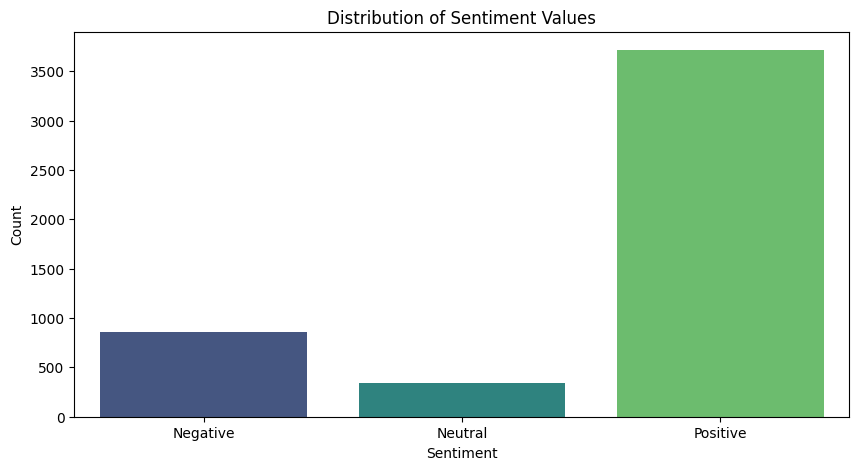

C:\Users\Deshan Sumanathilaka\AppData\Local\Temp\ipykernel_7228\4218115800.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall', data=df, order=overall_order, palette='viridis')


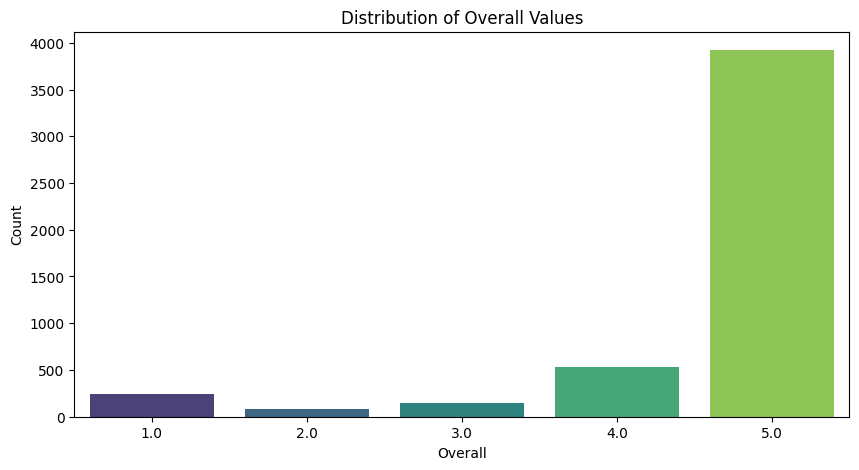

In [18]:
# Set the order of categories for better visualization
sentiment_order = ['Negative', 'Neutral', 'Positive']
overall_order = [1.0, 2.0, 3.0, 4.0, 5.0]

# Plot the distribution of 'Sentiment' values
plt.figure(figsize=(10, 5))
sns.countplot(x='Sentiment', data=df, order=sentiment_order, palette='viridis')
plt.title('Distribution of Sentiment Values')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plot the distribution of 'overall' values
plt.figure(figsize=(10, 5))
sns.countplot(x='overall', data=df, order=overall_order, palette='viridis')
plt.title('Distribution of Overall Values')
plt.xlabel('Overall')
plt.ylabel('Count')
plt.show()

#Plotting overall Rating against the sentiment

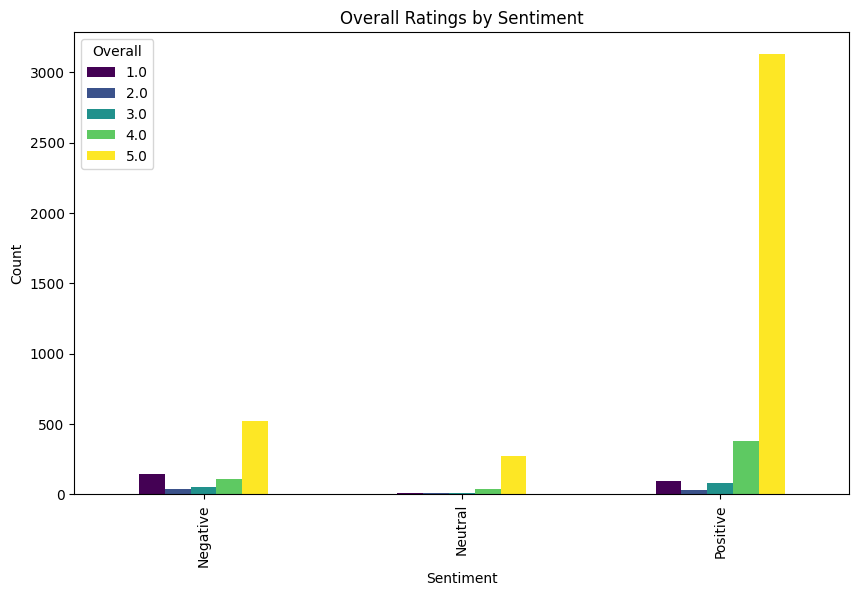

In [19]:
# Create a DataFrame with counts of 'overall' ratings for each 'Sentiment'
grouped_counts = df.groupby(['Sentiment', 'overall']).size().unstack(fill_value=0)[overall_order]
grouped_counts = grouped_counts.reindex(sentiment_order)

# Plot the grouped bar plot
grouped_counts.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='viridis')
plt.title('Overall Ratings by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Overall')
plt.show()

In [27]:
df=df[['overall','reviewText', 'polarity_score','Sentiment']]
df

overall                                         reviewText  \
0         4.0                                          no issues   
1         5.0  purchased device worked advertised never much ...   
2         4.0  works expected sprung higher capacity think ma...   
3         5.0  think worked great diff bran gb card went sout...   
4         5.0  bought retail packaging arrived legit orange e...   
...       ...                                                ...   
4910      1.0  bought sandisk gb class use htc inspire months...   
4911      5.0  used extending capabilities samsung galaxy not...   
4912      5.0  great card fast reliable comes optional adapte...   
4913      5.0        good amount space stuff want fits gopro say   
4914      5.0  heard bad things gb micro sd card crapping wee...   

      polarity_score  Sentiment  
0            -0.2960         -1  
1            -0.2960         -1  
2            -0.3089         -1  
3             0.9201          1  
4             0.7087          1  
...              ...        ...  
4910          0.0772          1  
4911          0.1761          1  
4912          0.8481          1  
4913          0.4939          1  
4914          0.0516          1  

[4915 rows x 4 columns]

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [32]:
# Assuming 'rating' and 'feedback' as predictors and 'sentiment' as the target
X = df[['overall', 'reviewText']]
y = df['Sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text feedback to numerical features using TF-IDF
#Can use alternative methods like word2vec or FastText
tfidf = TfidfVectorizer()
X_train_feedback_tfidf = tfidf.fit_transform(X_train['reviewText'])
X_test_feedback_tfidf = tfidf.transform(X_test['reviewText'])

# Concatenate rating and transformed feedback
X_train_combined = pd.concat([X_train[['overall']].reset_index(drop=True), pd.DataFrame(X_train_feedback_tfidf.toarray())], axis=1)
X_test_combined = pd.concat([X_test[['overall']].reset_index(drop=True), pd.DataFrame(X_test_feedback_tfidf.toarray())], axis=1)

X_train_combined.columns = X_train_combined.columns.astype(str)
X_test_combined.columns = X_test_combined.columns.astype(str)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_combined, y_train)
logistic_predictions = logistic_model.predict(X_test_combined)

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_combined, y_train)
tree_predictions = tree_model.predict(X_test_combined)

# Random Forest
forest_model = RandomForestClassifier()
forest_model.fit(X_train_combined, y_train)
forest_predictions = forest_model.predict(X_test_combined)

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_combined, y_train)
svm_predictions = svm_model.predict(X_test_combined)

# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, forest_predictions))
print("Support Vector Machine Accuracy:", accuracy_score(y_test, svm_predictions))





c:\Users\Deshan Sumanathilaka\anaconda3\envs\llm\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8087487283825026
Decision Tree Accuracy: 0.7466937945066124
Random Forest Accuracy: 0.780264496439471
Support Vector Machine Accuracy: 0.762970498474059

Logistic Regression Classification Report:
               precision    recall  f1-score   support

          -1       0.77      0.47      0.59       179
           0       1.00      0.04      0.08        74
           1       0.81      0.97      0.88       730

    accuracy                           0.81       983
   macro avg       0.86      0.49      0.52       983
weighted avg       0.82      0.81      0.77       983



In [33]:
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, logistic_predictions))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, tree_predictions))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, forest_predictions))
print("\nSupport Vector Machine Classification Report:\n", classification_report(y_test, svm_predictions))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

          -1       0.77      0.47      0.59       179
           0       1.00      0.04      0.08        74
           1       0.81      0.97      0.88       730

    accuracy                           0.81       983
   macro avg       0.86      0.49      0.52       983
weighted avg       0.82      0.81      0.77       983


Decision Tree Classification Report:
               precision    recall  f1-score   support

          -1       0.52      0.52      0.52       179
           0       0.28      0.22      0.24        74
           1       0.84      0.86      0.85       730

    accuracy                           0.75       983
   macro avg       0.55      0.53      0.54       983
weighted avg       0.74      0.75      0.74       983


Random Forest Classification Report:
               precision    recall  f1-score   support

          -1       0.85      0.25      0.38       179
      

c:\Users\Deshan Sumanathilaka\anaconda3\envs\llm\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Deshan Sumanathilaka\anaconda3\envs\llm\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Deshan Sumanathilaka\anaconda3\envs\llm\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [37]:
def predict_sentiment(rating, feedback):
    # Preprocess user input similar to the training data
    user_input = pd.DataFrame({'overall': [rating], 'reviewText': [feedback]})

    # Convert text feedback to numerical features using the trained TF-IDF vectorizer
    user_feedback_tfidf = tfidf.transform(user_input['reviewText'])

    # Concatenate rating and transformed feedback
    user_combined = pd.concat([user_input[['overall']].reset_index(drop=True), pd.DataFrame(user_feedback_tfidf.toarray())], axis=1)
    user_combined.columns = user_combined.columns.astype(str)

    # Predict sentiment using the trained models
    logistic_prediction = logistic_model.predict(user_combined)
    tree_prediction = tree_model.predict(user_combined)
    forest_prediction = forest_model.predict(user_combined)
    svm_prediction = svm_model.predict(user_combined)

    return logistic_prediction[0], tree_prediction[0], forest_prediction[0], svm_prediction[0]


In [38]:
user_rating = 4
user_feedback = "Great product! Loved the experience."

logistic_pred, tree_pred, forest_pred, svm_pred = predict_sentiment(user_rating, user_feedback)

print(f"Logistic Regression Prediction: {logistic_pred}")
print(f"Decision Tree Prediction: {tree_pred}")
print(f"Random Forest Prediction: {forest_pred}")
print(f"Support Vector Machine Prediction: {svm_pred}")

Logistic Regression Prediction: 1
Decision Tree Prediction: 1
Random Forest Prediction: 1
Support Vector Machine Prediction: 1


In [39]:
#Building a voting classifier to combine the results of the different modules
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('logistic', logistic_model),
    ('decision_tree', tree_model),
    ('random_forest', forest_model),
    ('svm', svm_model)
], voting='hard')  # 'hard' voting considers majority votes

# Training the Voting Classifier
voting_classifier.fit(X_train_combined, y_train)

# Predicting with the Voting Classifier
voting_predictions = voting_classifier.predict(X_test_combined)

# Evaluate Voting Classifier
print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_predictions))
print("\nVoting Classifier Classification Report:\n", classification_report(y_test, voting_predictions))

c:\Users\Deshan Sumanathilaka\anaconda3\envs\llm\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 0.8016276703967447

Voting Classifier Classification Report:
               precision    recall  f1-score   support

          -1       0.77      0.45      0.57       179
           0       0.00      0.00      0.00        74
           1       0.81      0.97      0.88       730

    accuracy                           0.80       983
   macro avg       0.52      0.47      0.48       983
weighted avg       0.74      0.80      0.76       983



c:\Users\Deshan Sumanathilaka\anaconda3\envs\llm\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Deshan Sumanathilaka\anaconda3\envs\llm\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Deshan Sumanathilaka\anaconda3\envs\llm\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta